In [27]:
import napari
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
from scipy import signal

In [43]:
seed = 42
np.random.seed(seed)

## Generate signals

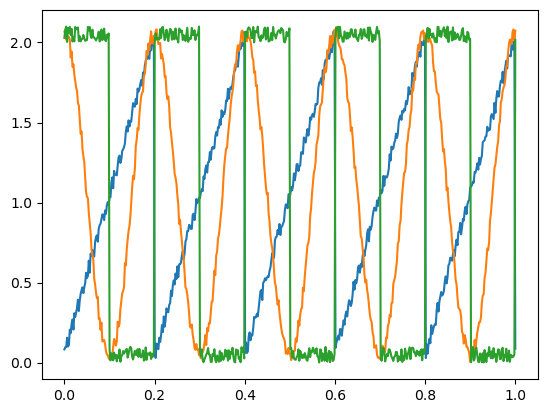

In [49]:
freq=5
time = np.linspace(0, 1, 500)
sawtooth = signal.sawtooth(2*np.pi*freq*time) + 1 + np.random.random(size=len(time))/10
cosine = np.cos(2*np.pi*freq*time) + 1 + np.random.random(size=len(time))/10
pulses = signal.square(2*np.pi*freq*time) + 1 + np.random.random(size=len(time))/10

plt.plot(time, sawtooth)
plt.plot(time, cosine)
plt.plot(time, pulses)

## Generate objects

In [50]:
disk = morphology.disk(4)

In [53]:
square = morphology.square(9)
square[square==1] = 2

In [54]:
diamond = morphology.diamond(4)
diamond[diamond==1] = 3

In [58]:
objects_list = [disk, square, diamond]

In [75]:
image = np.zeros((100, 100))
for i in range(10):
    for j in range(3):
        n = np.random.randint(low=0, high=3, size=1)[0]
        obj = objects_list[n]
        image[i*10: i*10+9, 20 + j*20 :20 + j*20 + 9] = obj
        
    

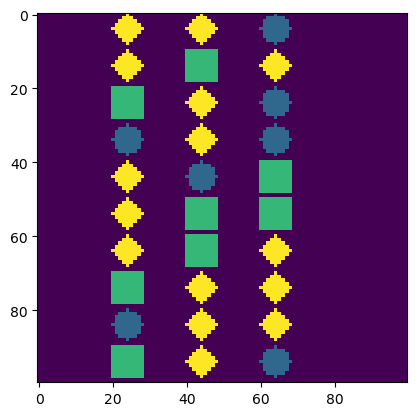

In [68]:
plt.imshow(image)

In [ ]:
## Add signal to image label

In [73]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 100, 100)

In [78]:
image2 = np.broadcast_to(image, shape=(len(pulses), *image.shape))
for i in range(len(pulses)):
    image2[i, image2==2] = pulses[i]

ValueError: assignment destination is read-only

In [83]:
i=0
image2[i, np.argwhere(image2[0]==2)] = pulses[i]

ValueError: assignment destination is read-only

In [126]:
A = np.arange(27).reshape(3,3,3)
A[A<14] = 1
A[A>=14] = 0
A

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [127]:
for i in range(A.shape[0]):
    print(i)
    obj_coords = np.argwhere(A[i]==1)
    print(obj_coords)
    for j in range(obj_coords.shape[0]):
        new_coord = [i, obj_coords[j, 0], obj_coords[j, 1]]
        print(new_coord)
        A[*new_coord] = 2

SyntaxError: invalid syntax (1130200703.py, line 8)

In [2]:
viewer=napari.Viewer()